# 台股當沖TreeMap

![jupyter](./treemap.jpg)

In [3]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import glob
import datetime
from finlab import data
from ipywidgets import interact
import warnings
import requests
from bs4 import BeautifulSoup 
warnings.filterwarnings("ignore")

## Data (即時更新)

In [11]:
path = 'C:\\Users\\qwtl0\\OneDrive\\文件\\Python\\台股股價資料\\'

In [64]:
label = pd.read_csv(path+'finlab_database.csv')
label

,name,item
0,自營商買進股數_自行買賣,data.get('institutional_investors_trading_summ...
1,自營商買進股數_避險,data.get('institutional_investors_trading_summ...
2,自營商買賣超股數_自行買賣,data.get('institutional_investors_trading_summ...
3,自營商買賣超股數_避險,data.get('institutional_investors_trading_summ...
4,自營商賣出股數_自行買賣,data.get('institutional_investors_trading_summ...
5,自營商賣出股數_避險,data.get('institutional_investors_trading_summ...
6,投信買進股數,data.get('institutional_investors_trading_summ...
7,投信買賣超股數,data.get('institutional_investors_trading_summ...
8,投信賣出股數,data.get('institutional_investors_trading_summ...
9,當日沖銷交易成交股數,data.get('intraday_trading:當日沖銷交易成交股數')


In [65]:
label_list = label['name']
get_list = label['item']
data.set_universe(market='TSE')

In [66]:
feature_dic = {}

for i, features in enumerate(label_list) :
    feature_dic[features] = data.get(label.item[i][10:-2])

In [67]:
feature_dic['當日報酬率'] = feature_dic['收盤價']/feature_dic['開盤價'] -1 

In [68]:
area_columns = ['自營商賣出股數_自行買賣', '融券今日餘額', '融券使用率', '融券前日餘額', '融券現券償還',
       '融券買進', '融券賣出', '融券限額', '融資今日餘額', '融資使用率', '融資前日餘額', '融資現金償還', '融資買進',
       '融資賣出', '融資限額', '資券互抵','成交筆數', '成交股數', '成交金額','當日沖銷交易成交股數',
       '當日沖銷交易買進成交金額', '當日沖銷交易賣出成交金額', '借券', '借券增減',
       '借券賣出', '借券賣出還券', '借券賣出限額', '借券賣出餘額', '借券還券', '借券餘額', '本益比', '殖利率%','股價淨值比']

In [69]:
for i, feature in enumerate(list(feature_dic.keys())):
    if i < 1 :
        df = pd.melt(feature_dic[feature].loc['2022-01-01':].reset_index(),id_vars = 'date',var_name = '股票代碼',value_name = feature)
        temp = df
        print(feature,'\t',df.shape[0])
    else :
        df = pd.melt(feature_dic[feature].loc['2022-01-01':].reset_index(),id_vars = 'date',var_name = '股票代碼',value_name = feature)
        temp = temp.merge(df, on = ['date','股票代碼'])
        print(feature,'\t',df.shape[0])

自營商買進股數_自行買賣 	 114264
自營商買進股數_避險 	 114264
自營商買賣超股數_自行買賣 	 114264
自營商買賣超股數_避險 	 114264
自營商賣出股數_自行買賣 	 114264
自營商賣出股數_避險 	 114264
投信買進股數 	 114264
投信買賣超股數 	 114264
投信賣出股數 	 114264
當日沖銷交易成交股數 	 107028
當日沖銷交易買進成交金額 	 107028
當日沖銷交易賣出成交金額 	 107028
資券互抵 	 112968
融券今日餘額 	 112968
融券使用率 	 112968
融券前日餘額 	 112968
融券限額 	 112968
融券現券償還 	 112968
融券買進 	 112968
融券賣出 	 112968
融資今日餘額 	 112968
融資使用率 	 112968
融資前日餘額 	 112968
融資限額 	 112968
融資現金償還 	 112968
融資買進 	 112968
融資賣出 	 112968
成交股數 	 115560
成交金額 	 115560
成交筆數 	 115560
收盤價 	 115560
最低價 	 115560
最高價 	 115560
開盤價 	 115560
本益比 	 112536
股價淨值比 	 112536
殖利率_% 	 112536
當日報酬率 	 115560


In [79]:
industry = pd.read_pickle(path+'產業類別.pkl')
industry = industry.rename(columns = {'stock_id':'股票代碼'})
industry

,股票代碼,產業類別
0,1101,水泥工業
1,1102,水泥工業
2,1103,水泥工業
3,1104,水泥工業
4,1108,水泥工業
...,...,...
2090,9944,其他
2091,9945,其他
2092,9946,建材營造
2096,9955,其他


In [80]:
temp = temp.merge(industry, on ='股票代碼' )

In [83]:
temp['country'] = '上市股票'

## TreeMap

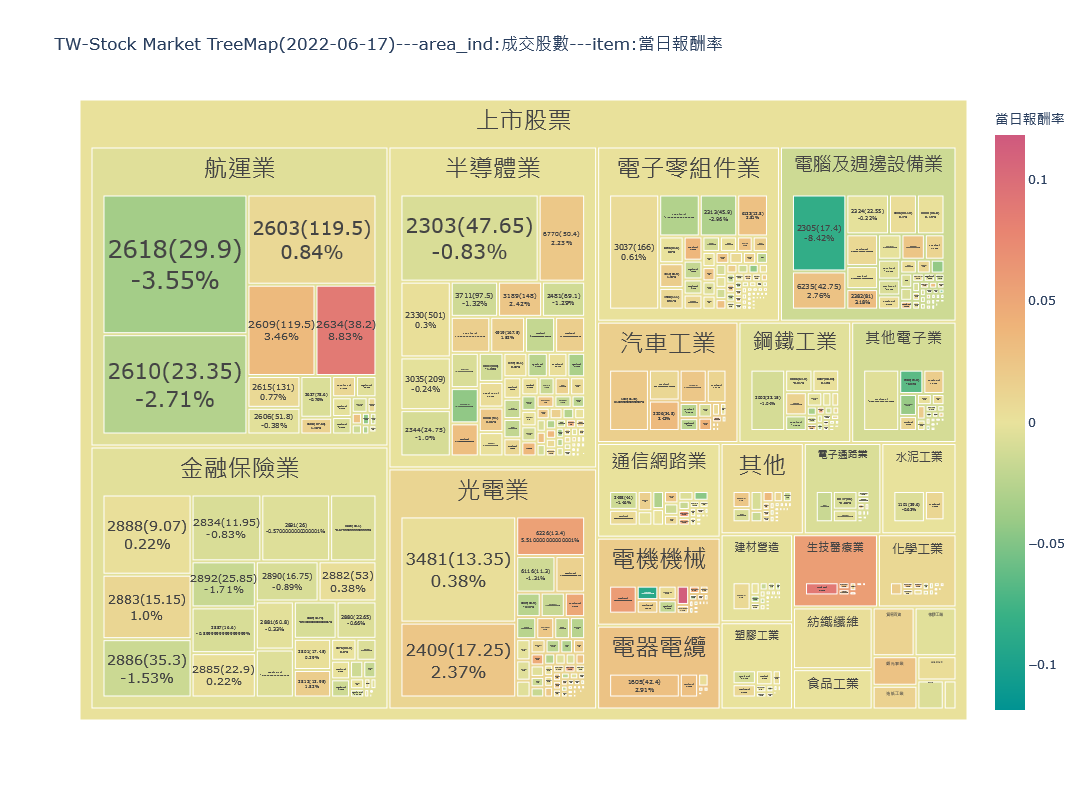

In [97]:
TW_treemap('成交股數')

In [84]:
interact(TW_treemap,area_ind = area_columns)

interactive(children=(Dropdown(description='area_ind', options=('自營商賣出股數_自行買賣', '融券今日餘額', '融券使用率', '融券前日餘額', '…

<function __main__.TW_treemap(area_ind, item='當日報酬率', color_scales='Temps')>

## Function

In [96]:
def TW_treemap(area_ind, item='當日報酬率', color_scales='Temps') :
    start = str(temp.date.max())[:10]
    #end = str(dataset.date.max())[:10]
    
    df = temp.set_index('date').loc[start:]
    df = df.dropna(subset = '當日報酬率')
    df['ret_str'] = round(df['當日報酬率'],4)*100
    df['ret_str'] = df['ret_str'].apply(lambda x : str(x) + '%')
    # df[area_ind] = df[area_ind].fillna(0)
    # df = df[df[area_ind]!=0]
    
    color_continuous_midpoint = 0
    
    fig = px.treemap(df,
                     path=['country', '產業類別', '股票代碼'],
                     values=area_ind,
                     color=item,
                     color_continuous_scale=color_scales,
                     color_continuous_midpoint=color_continuous_midpoint,
                     custom_data=['收盤價','ret_str'],
                     title=f'TW-Stock Market TreeMap({start})'
                           f'---area_ind:{area_ind}---item:{item}',
                     width=1000,
                     height=800)

    fig.update_traces(textposition='middle center',
                      textfont_size=24,
                      texttemplate="%{label}(%{customdata[0]})<br>%{customdata[1]}",
                      )
    return fig

## 資料整理區

In [21]:
# ii_dic = {}  # 法人資料
# loan_dic = {} # 融資融券
# stock_dic = {} # 股價資料
# intra_dic = {} # 當沖資料
# borrow_dic = {} # 借券資料
# fi_dic = {} # 日財務報表資料

# data_name = ['法人資料', '融資融券資料', '股價資料', '當沖資料', '借券資料', '日財務報表資料']

# for i, dic in enumerate([ii_dic,loan_dic,stock_dic,intra_dic,borrow_dic,fi_dic]) :
#     for filename in glob.glob(path+data_name[i]+'\\*.pkl'):
#         dic.update({filename[42+len(data_name[i]):][:-4]:pd.read_pickle(filename)})    


In [51]:
# for i, dic in enumerate([ii_dic,loan_dic,stock_dic,intra_dic,borrow_dic,fi_dic]) :
#     for feature in list(dic.keys()):
#         if i < 1 :
#             df = pd.melt(dic[feature].loc['2014-01-01':].reset_index(),id_vars = 'date',var_name = '股票代碼',value_name = feature)
#             temp = df
#             print(feature,'\t',df.shape[0])
#         else :
#             df = pd.melt(dic[feature].loc['2014-01-01':].reset_index(),id_vars = 'date',var_name = '股票代碼',value_name = feature)
#             temp = temp.merge(df, on = ['date','股票代碼'])
#             print(feature,'\t',df.shape[0])
#         del df

外資自營商買賣超股數 	 2187944
外資自營商買進股數 	 2187944
外資自營商賣出股數 	 2187944
外陸資買賣超股數_不含外資自營商 	 2187944
外陸資買進股數_不含外資自營商 	 2187944
外陸資賣出股數_不含外資自營商 	 2187944
投信買賣超股數 	 2187944
投信買進股數 	 2187944
投信賣出股數 	 2187944
自營商買賣超股數_自行買賣 	 2187944
自營商買進股數_自行買賣 	 2187944
自營商買進股數_避險 	 2187944
自營商賣出股數_自行買賣 	 2187944
融券今日餘額 	 2163128
融券使用率 	 2163128
融券前日餘額 	 2163128
融券現券償還 	 2163128
融券買進 	 2163128
融券賣出 	 2163128
融券限額 	 2163128
融資今日餘額 	 2163128
融資使用率 	 2163128
融資前日餘額 	 2163128
融資現金償還 	 2163128
融資買進 	 2163128
融資賣出 	 2163128
融資限額 	 2163128
資券互抵 	 2163128
全額交割股 	 2212760
成交筆數 	 2212760
成交股數 	 2212760
成交金額 	 2212760
收盤價 	 2212760
最低價 	 2212760
最高價 	 2212760
注意股 	 2212760
處置股 	 2227740
調整後收盤價 	 2212760
調整後最低價 	 2212760
調整後最高價 	 2212760
調整後開盤價 	 2212760
開盤價 	 2212760
得先賣後買當沖 	 2047406
當日沖銷交易成交股數 	 2047406
當日沖銷交易買進成交金額 	 2047406
當日沖銷交易賣出成交金額 	 2047406
借券 	 2165268
借券增減 	 2165268
借券賣出 	 2214828
借券賣出還券 	 2214828
借券賣出限額 	 2214828
借券賣出餘額 	 2214828
借券還券 	 2165268
借券餘額 	 2165268
本益比 	 2154856
殖利率% 	 2154856
股價淨值比 	 2154856
